> # **Métodos Computacionales I - Taller #2**

Hecho por: Claudia Cuellar Nieto & Thomas Andrade Hernández


In [8]:
# Zona de librerías:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib import rc
import sympy as sym
import pandas as pd
from tqdm import tqdm
from time import sleep
import os.path as path
import os
import wget

> **3. Derivación e Integración Numérica:**

**8.** Es posible construir una aproximación de orden $\mathcal{O}(h^2)$ para la derivada progresiva. Para tal propósito, se escribe el polinomio de interpolación de grado 2 para el conjunto soporte 

$$\Omega = \{(x_0, f(x_0)),(x_1, f(x_1)),(x_2, f(x_2))\}$$

y posteriormente se calcula la derivada de este polinomio.

**a)** **$\verb|(Theoretical)|$** Calcular analíticamente el polinomio que interpola el conjunto soporte.

> **$\verb|Respuesta:|$**

**b)** **$\verb|(Theoretical)|$** Derivar el polinomio interpolador para encontrar la derivada en el punto $x_0$:

$$f'(x) \approx p'(x_0) = \frac{1}{2h} \cdot (-3f(x_0) + 4f(x_1) - f(x_2)).$$

Si la discretización es equidistante, tenemos:

$$f'(x) \cong \frac{1}{2h} \cdot (-3f(x) + 4f(x + h) - f(x + 2h)).$$

> **$\verb|Respuesta:|$**

**c)** $\verb|(Python)|$ Para $f(x) = \sqrt{\tan(x)}$ estimar la derivada progresiva de orden $\mathcal{O}(h^2)$ (expresión anterior) en el intervalo $[0.1, 1-1]$ con $h = 0.01$.

**d)** $\verb|(Python)|$ Para $f(x) = \sqrt{\tan(x)}$ estimar la derivada ceantral de orden $\mathcal{O}(h^2)$ en el intervalo $[0.1, 1-1]$ con $h = 0.01$.

**e)** **$\verb|(Theoretical)|$** Calcule analíticamente la derivada de la función $f(x)$, y grafique con la estimación central y progresiva de orden $\mathcal{O}(h^2)$.


> **$\verb|Respuesta:|$**

**f)** **$\verb|(Theoretical)|$** Grafique el error nodal para ambas aproximaciones. ¿Tienen efectivamente el mismo orden de precisión ambos resultados?

> **$\verb|Respuesta:|$**

> **3.10. Raíces de Polinomios:**

**5.** $\verb|(SymPy)|$ Calcular todas las raíces reales de los primeros 20 polinomios de Laguerre. La formula de Rodrigues es:

$$L_{n}(x) = \frac{e^{x}}{n!} \cdot \frac{d^{n}}{dx^{n}} [e^{-x} x^{n}].$$

El intervalo donde existen las raíces es $0 \leq x \leq \infty$.

In [3]:
# Primera parte enfocada en encontrar los primeros 20 polinomios de Laguerre:

x = sym.symbols('x')

def LaguerrePolynomia(n):
    if n >= 0:
        semi_laguerre = (np.e**x)/np.math.factorial(n)
        main_laguerre = (np.e**(-x))*(x**n)

        if n >= 1:
            for i in range(1, n + 1):
                main_laguerre = sym.diff(main_laguerre, x)
        polynomia = sym.simplify(main_laguerre * semi_laguerre)
        return polynomia
    
    else:
        print("El valor de \"n\" digitado no es válido.")

"""
Laguerre_20th = [] # Lista que almacenará todos los 20 primeros polinomios de Laguerre.

for i in range(0, 20):
   Laguerre_20th.append(LaguerrePolynomia(i))
"""

# Segunda parte enfocada en hallar las raíces de cada polinomio:

def PolynomiaDerivative(f, x, h = 1e-4):
    return (f(x + h) - f(x - h)) / (2*h)

def NewtonRaphson(f, diff_f, xn, itmax = 1000, precision = 1e-5):
    error = 1
    it = 0

    while error > precision and it <= itmax:
        try:
            xn1 = xn - f(xn)/diff_f(f,xn)
            error = np.abs(f(xn)/diff_f(f,xn))
        except ZeroDivisionError:
            print('Division por cero')
        it += 1
        xn = xn1

    if it == itmax:
        False
    else:
        return xn

def GetAllRoots(f, x, tolerancia = 6):
    Roots = np.array([])
    for i in x:
        root = NewtonRaphson(f, PolynomiaDerivative, i)
        if root != False:
            croot = np.round(root, tolerancia)
            if croot not in Roots: 
                Roots = np.append(Roots,croot)
    Roots.sort()
    return Roots

# Falta generar el ciclo que entregue el valor de las iteraciones reflejado en las raíces de cada polinomio de Laguerre.

> **3.13. Interpolación de Lagrange:**

**1.** **$\verb|(Theoretical)|$** Demuestre que el polinomio interpolador es único.

> **$\verb|Respuesta:|$**

**4.** $\verb|(Python)|$ En el lanzamiento de una bala, una cámara fotográfica registra las siguientes posiciones en metros respecto al arma homicida (tome $\vec{g} = −9.8$ $m/s^2 \cdot \hat{j}$):

Link: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv

Estime el vector velocidad inicial, que estaría definido por la magnitud y dirección. **Rpta: $V_{0} = 10 m/s$ y $\theta = 20^{\circ}$**. *Hint:* Encuentre el término lineal y cuadrático de la interpolación y compare con la ecuación de trayectoria de la bala.

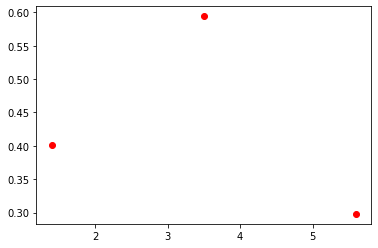

In [20]:
# Instancia de descarga del .csv para el análisis de los datos:

if not path.exists('Data'):
    os.mkdir('Data')

file = 'Data/Tiro_Parabolico.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

# Código principal:

main_data = pd.read_csv(Path_)

X = np.float64(main_data.X)
Y = np.float64(main_data.Y)
plt.scatter(X, Y, color='r, marker='o')


**5.** $\verb|(Python)|$ _Interpolación Newton-Gregory_: Para el siguiente conjunto de puntos:

Link: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv

Encuentre el polinomio interpolante de menor grado usando el método Newton-Gregory.

> **3.14. Integración:**

**1.** **$\verb|(Theoretical)|$** Hacer pasos intermedios para regla de trapecio simple, es decir, la siguiente ecuación:

$$I = \int_{a}^{b}{f(x) dx} \cong \int_{a}^{b}{p_{1}(x) dx} = \frac{b - a}{2} \cdot (f(a) + f(b))$$


> **$\verb|Respuesta:|$**

**3.** **$\verb|(Theoretical)|$** Hacer pasos intermedios para encontrar la regla de Simpson simple, es deicr, en la siguiente ecuación:

$$I = \int_{a}^{b}{f(x) dx} \cong \int_{a}^{b}{p_{2}(x) dx} = \frac{h}{3} \cdot (f(a) + 4f(x_m) + f(b)).$$

> **$\verb|Respuesta:|$**

**7)** **$\verb|(Python)|$** . Una forma de generalizar el método de integración del trapecio para una integral doble de una función $f(x, y)$ consiste en dividir el plano $xy$ en un grilla de cuadrados iguales y calcular el promedio del valor de la función de cada uno de los 4 vértices de cada cuadrado pequeño de la grilla. Calcule numéricamente el volumen de una semiesfera de radio $R = 1$ como sigue:


* Cree una grilla entre $−R$ y $R$ en el plano $xy$, donde el número de cuadrados en cada lado de la grilla sea $n$. Es decir, la grilla tendría $n + 1$ puntos en cada eje, y $n^2$ cuadrados pequeños.

* Para cada cuadrado pequeño calcule el promedio de la función en los cuatro vértices
y multiplique por el área del cuadrado pequeñoo. Si el punto queda fuera de la esfera
asuma que el valor de la función $f(x, y)$ es cero.

**13)** $\verb|(Python)|$ Escribir el polinomio $p(x) 3 + 5x + x^{2}$ en la base de Legendre. **Rpta:** $p(x) = \frac{10}{3}p_{0}(x) + 5p_{1}(x) + \frac{2}{3}p_{2}(x)$.

**17)** **$\verb|(Python)|$** La cuadratura de Gauss-Hermite está definida para integrales de la forma:

$$I = \int_{- \infty}^{\infty}{f(x) \cdot e^{-x^{2}}dx}$$

que tiene la siguiente representación en cuadraturas:

$$I \approx \sum_{i = 1}^{N} \omega_{i} \cdot f(x_{i})$$

donde los puntos $x_{i}$ son las raíces de los polinomios de Hermite $(H_{n}(x))$ y la formula de pesos está dada por:

$$\omega_{i} = \frac{2^{n - 1} \cdot n! \cdot \sqrt{\pi}}{n^{2} \cdot H_{n - 1}(r_{i})^{2}}$$

El estado de un oscilador armónico en mecánica cuántica está dado por las funciones de probabilidad:

$$\phi_{n}(\xi) = \frac{1}{\sqrt{2^{n} \cdot n!}} \left(\frac{m\omega}{\pi \hbar} \right)^{1/4} \cdot e^{\xi^{2}/2 \cdot H_{n}(\xi)}$$

donde $\xi = \frac{\sqrt{m\omega}}{\hbar} \cdot x$. Haga $\frac{\sqrt{m\omega}}{\hbar} = 1$, es decir, $\xi = 1$ para la aplicación numérica. Estime numéricamente el valor cuadrático medio de la posición de la particula en el primer estado exitado $(n = 1)$. El valor exacto de la integral está dado por:

$$\langle x^{2} \rangle = \int_{- \infty}^{\infty} |\phi_{1}(x)|^{2} \cdot x^{2} dx = \frac{3}{2}.$$

El polinomio de Hermite de primer orden está dado por:

$$H_{1}(x) = 2x.$$

La formula de rodrigues que genera los polinomios de Hermite está dada por:

$$H_{n}(\xi) = (-1){n} \cdot e^{\xi^{2}} \cdot \frac{d^{n}}{d\xi^{n}} \cdot e^{-\xi^{2}}.$$

Encontrar los ceros de los polinomios y los pesos de la cuadratura.